An algorithm for listing all edges on a path from A-to-B.

In [1]:
from typing import List, Tuple
import networkx as nx


def get_relevant_edges(
    graph: nx.DiGraph,
    src: int,
    dest: int
) -> List[Tuple[int, int]]:
    """Get all edges that lie on a path between two nodes.
    
    Args:
        graph: directed graph to search over
        src: source node
        dest: destination node

    Returns:
        List[Tuple[int, int]]: edges that lie on a path between src/dest

    An edge is "relevant" if it points from a node to the destination.
    A node is "relevant" if it is the parent of the destination.
    An edge is also "relevant" if it points from a node to a relevant node.
    A node is also "relevant" if it is the parent of a relevant node.
    Nodes/edges that cannot be reached from the source are excluded.
    
    This function runs a modified depth-first search (DFS).
    DFS ensures that all nodes/edges searched are source-reachable.
    It also lets us determine relevance working backward from the destination.
    This will not translate to breadth-first search (BFS).
    """
    searched = set()  # for avoid duplicate search
    relevant = set()  # nodes that lead to dest
    
    def search(start: int) -> List[Tuple[int, int]]:
        edges = []
        searched.update([start])
        for node in graph.successors(start):
            if node == dest:
                edges.append((start, node))
                relevant.update([start])
                continue
            if node not in searched:
                edges.extend(search(node))
            if node in relevant:
                edges.append((start, node))
                relevant.update([start])
        return edges

    return search(src)

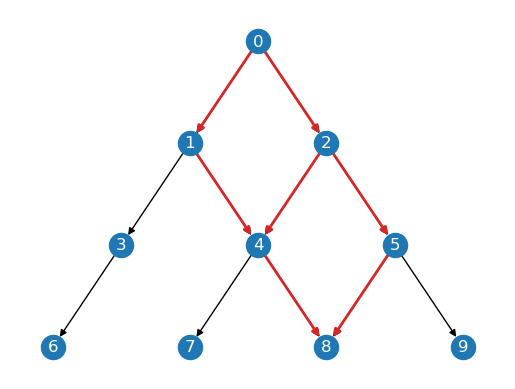

In [2]:
import matplotlib.pyplot as plt


# spoof data
G = nx.DiGraph()
G.add_edges_from([
    [0, 1], [0, 2],
    [1, 3], [1, 4],
    [2, 4], [2, 5],
    [3, 6], [4, 7], [4, 8],
    [5, 8], [5, 9]
])
pos = {
    0: (2, 4),
    1: (1.5, 3), 2: (2.5, 3),
    3: (1, 2), 4: (2, 2), 5: (3, 2),
    6: (0.5, 1), 7
    : (1.5, 1), 8: (2.5, 1), 9: (3.5, 1)
}


# plot graph and highligh relevant edges
fig, axes = plt.subplots()
nx.draw(G, pos, with_labels=True, font_color='white', ax=axes)
_ = nx.draw_networkx_edges(
    G,
    pos,
    edgelist=get_relevant_edges(G, 0, 8),
    width=2,
    alpha=1,
    edge_color="tab:red",
)